# Graphiti Agent

그래피티(Graphiti)는 AI 에이전트를 위해 설계된 시간 인식 지식 그래프 구축을 위한 파이썬 프레임워크입니다. 일괄 재계산 없이 지식 그래프에 대한 실시간 증분 업데이트를 가능하게 하여, 관계와 정보가 시간에 따라 진화하는 동적 환경에 적합합니다.

![](https://steemitimages.com/300x0/https://github.com/gongwon-nayeon/graphiti-agent-tutorial/raw/main/graphiti_agent.png)

참고: https://github.com/gongwon-nayeon/graphiti-agent-tutorial/blob/main/graphiti_agent.ipynb

이번 튜토리얼에서는 [Neo4j Sandbox](https://sandbox.neo4j.com/)를 사용합니다.
> Neo4j Sandbox란? **온라인 그래프 데이터베이스**로, 무료 클라우드 기반 Neo4j 인스턴스를 구축할 수 있기 떄문에 간편하게 리소스를 빌려 그래프DB를 실험 할 수 있습니다.

## 설치하기

필요한 패키지((graphiti, langgraph, langchain, 등)을 설치합니다.

In [1]:
%%capture --no-stderr
%pip install -qU langgraph langchain-core langchain-openai 
%pip install -qU graphiti-core

## 환경 설정

graphiti를 실행하는데 필요한 환경변수를 설정합니다. graphiti는 OpenAI를 사용하므로 OpenAI API Key가 필요합니다.

In [2]:
import os
from dotenv import load_dotenv

load_dotenv(override=True)

os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_PROJECT"] = "langchain-academy"

neo4j_uri = os.environ.get("NEO4J_URI")
neo4j_user = os.environ.get("NEO4J_USERNAME")
neo4j_password = os.environ.get("NEO4J_PASSWORD")

if not neo4j_uri or not neo4j_user or not neo4j_password:
    raise ValueError("NEO4J_URI, NEO4J_USERNAME, and NEO4J_PASSWORD must be set")

In [3]:
import logging

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(name)s - %(levelname)s - %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S",
)
logger = logging.getLogger(__name__)

## Graphiti 사용하기

In [ ]:
from graphiti_core import Graphiti

# Graphiti 초기화
graphiti = Graphiti(neo4j_uri, neo4j_user, neo4j_password)

await graphiti.build_indices_and_constraints()

2025-10-20 20:54:45 - neo4j.notifications - INFO - Received notification from DBMS server: <GqlStatusObject gql_status='00NA0', status_description="note: successful completion - index or constraint already exists. The command 'CREATE RANGE INDEX valid_at_episodic_index IF NOT EXISTS FOR (e:Episodic) ON (e.valid_at)' has no effect. The index or constraint specified by 'RANGE INDEX valid_at_episodic_index FOR (e:Episodic) ON (e.valid_at)' already exists.", position=None, raw_classification='SCHEMA', classification=<NotificationClassification.SCHEMA: 'SCHEMA'>, raw_severity='INFORMATION', severity=<NotificationSeverity.INFORMATION: 'INFORMATION'>, diagnostic_record={'_classification': 'SCHEMA', '_severity': 'INFORMATION', 'OPERATION': '', 'OPERATION_CODE': '0', 'CURRENT_SCHEMA': '/'}> for query: 'CREATE INDEX valid_at_episodic_index IF NOT EXISTS FOR (n:Episodic) ON (n.valid_at)'
2025-10-20 20:54:45 - neo4j.notifications - INFO - Received notification from DBMS server: <GqlStatusObject gq

## 1. 에피소드 추가

에피소드는 Graphiti의 기본 단위입니다.

**에피소드 유형**은 다음과 같습니다.
- `text`: 비정형 택스트 데이터
- `message`: 대화형 메시지 형식
- `json`: 구조화된 데이터

In [5]:
from graphiti_core.nodes import EpisodeType

episodes = [
    {
        "type": EpisodeType.json,
        "name": "OpenAI",
        "content": {
            "name": "OpenAI",
            "founded": "2015-12-8",
            "founders": "Sam Altman",
            "type": "AI 연구 개발 기업",
            "official_website": "https://openai.com/",
        },
        "description": "article metadata",
    },
    {
        "type": EpisodeType.text,
        "name": "OpenAI의 기본 모델",
        "content": "2024년 5월 기준, OpenAI의 기본 모델은 GPT-4o입니다.",
        "description": "news article",
    },
]

In [7]:
# 에피소스 등록하기
import json
from datetime import datetime, timezone


for i, episode in enumerate(episodes):
    await graphiti.add_episode(
        name=episode["name"],
        episode_body=episode["content"]
        if isinstance(episode["content"], str)
        else json.dumps(episode["content"]),
        source=episode["type"],
        source_description=episode["description"],
        reference_time=datetime.now(timezone.utc),
    )
    print(f"Added episode: {episode['name']} ({episode['type'].value})")

2025-10-20 20:55:02 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/responses "HTTP/1.1 200 OK"
2025-10-20 20:55:04 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-10-20 20:55:04 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-10-20 20:55:04 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-10-20 20:55:04 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-10-20 20:55:07 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/responses "HTTP/1.1 200 OK"
2025-10-20 20:55:17 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/responses "HTTP/1.1 200 OK"
2025-10-20 20:55:18 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-10-20 20:55:20 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025

Added episode: OpenAI (json)


2025-10-20 20:55:42 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/responses "HTTP/1.1 200 OK"
2025-10-20 20:55:43 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-10-20 20:55:43 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-10-20 20:55:46 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/responses "HTTP/1.1 200 OK"
2025-10-20 20:55:48 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-10-20 20:55:49 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-10-20 20:55:50 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-10-20 20:55:52 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/responses "HTTP/1.1 200 OK"
2025-10-20 20:55:52 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025

Added episode: OpenAI의 기본 모델 (text)


새로운 에피소드 추가하기

In [ ]:
new_episodes = [
    {
        "name": "새로운 모델 출시",
        "content": "OpenAI의 현재 기본 모델은 8월 8일부로 GPT-5로 변경되었습니다."
        "GPT-5는 전반적으로 훨씬 더 스마트하며, 특히 수학, 코딩, 시각적 인식, 의료 분야의 학술적 및 인간 평가 벤치마크에서의 성과에서 확인할 수 있습니다. "
        "수학(도구 없이 AIME 2025에서 94.6%), 실제 코딩(SWEBench에서 74.9%, 에이더 폴리글롯에서 88%), 멀티모달 이해(MMU에서 84.2$), 의료(HealthBench Hard에서 46.2%) 전반에서 새롭게 최고 기록을 세웠으며 이러한 이점은 일상 사용에도 적용됩니다. ",
        "type": EpisodeType.text,
        "description": "news article",
    }
]

for i, episode in enumerate(new_episodes):
    await graphiti.add_episode(
        name=episode["name"],
        episode_body=episode["content"]
        if isinstance(episode["content"], str)
        else json.dumps(episode["content"]),
        source=episode["type"],
        source_description=episode["description"],
        reference_time=datetime.now(timezone.utc),
    )
    print(f"Added episode: {episode['name']} ({episode['type'].value})")

2025-10-20 20:57:05 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/responses "HTTP/1.1 200 OK"
2025-10-20 20:57:05 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-10-20 20:57:05 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-10-20 20:57:05 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-10-20 20:57:05 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-10-20 20:57:05 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-10-20 20:57:05 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-10-20 20:57:05 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-10-20 20:57:06 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
20

Added episode: 새로운 모델 출시 (text)


## 2. 에피소드 검색하기

### (1) 기본 검색

In [ ]:
query = "OpenAI의 정보를 알려주세요."

results = await graphiti.search(query)

for result in results:
    print(f"UUID: {result.uuid}")
    print(f"Fact: {result.fact}")
    if hasattr(result, "valid_at") and result.valid_at:
        print(f"Valid from: {result.valid_at}")
    if hasattr(result, "invalid_at") and result.invalid_at:
        print(f"Valid until: {result.invalid_at}")
    print("-" * 50)

2025-10-20 21:10:51 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


UUID: 19301958-398a-4976-807f-9976251958dd
Fact: GPT-5가 OpenAI의 현재 기본 모델이다.
Valid from: 2025-10-20 11:56:59.540507+00:00
--------------------------------------------------
UUID: 12176a8f-c5dc-47c2-af33-b2157b4d8066
Fact: OpenAI is an AI 연구 개발 기업 (AI research and development company).
Valid from: 2025-10-19 09:23:22.008159+00:00
Valid until: 2025-10-19 09:24:03.380744+00:00
--------------------------------------------------
UUID: 87e7cbf8-d653-4e79-ab97-63782189b381
Fact: OpenAI의 기본 모델이 2025-08-08부로 변경되었다.
Valid from: 2025-08-08 00:00:00+00:00
Valid until: 2025-10-19 09:23:22.008159+00:00
--------------------------------------------------
UUID: 5ac5606a-d491-410e-ab7b-71f64755fc06
Fact: 2024년 5월 기준으로 OpenAI의 기본 모델은 GPT-4o이다.
Valid from: 2025-10-19 09:24:03.380744+00:00
Valid until: 2025-10-20 11:56:59.540507+00:00
--------------------------------------------------
UUID: c4478d40-fd0b-4b3c-b12d-44f05a342873
Fact: OpenAI's official website is https://openai.com/.
Valid from: 2025-10-19 09

### (2) 중심 노드 기반 검색

In [ ]:
query = "OpenAI에 대해서 알려주세요."

# 상위 검색 결과의 소스 노드 UUID를 중심 노드로 사용하여 검색합니다.
center_node_uuid = results[0].source_node_uuid

reranked_results = await graphiti.search(query, center_node_uuid)

for result in reranked_results:
    print(f"UUID: {result.uuid}")
    print(f"Fact: {result.fact}")
    if hasattr(result, "valid_at") and result.valid_at:
        print(f"Valid from: {result.valid_at}")
    if hasattr(result, "invalid_at") and result.invalid_at:
        print(f"Valid until: {result.invalid_at}")
    print("-" * 50)

2025-10-20 21:10:59 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


UUID: 19301958-398a-4976-807f-9976251958dd
Fact: GPT-5가 OpenAI의 현재 기본 모델이다.
Valid from: 2025-10-20 11:56:59.540507+00:00
--------------------------------------------------
UUID: b8eba59b-9a61-424a-afd1-7bdf8c84c760
Fact: GPT-5는 도구 없이 AIME 2025에서 94.6%를 기록했다.
--------------------------------------------------
UUID: a70c838c-d5c6-40a4-9e3b-6dd81018cace
Fact: GPT-5는 멀티모달 이해(MMU)에서 84.2%를 기록했다.
--------------------------------------------------
UUID: a298db0c-282d-4330-a05a-eec7ba684573
Fact: GPT-5는 시각적 인식 분야에서 전반적으로 훨씬 더 스마트하며 벤치마크 성과에서 우수하다.
--------------------------------------------------
UUID: 1fbaf8f1-bdcc-435b-abef-92ded9105683
Fact: GPT-5는 에이더 폴리글롯에서 88%를 기록했다.
--------------------------------------------------
UUID: 9a5323d5-4b1c-48d3-8277-88d1067d33da
Fact: GPT-5의 성능상의 이점은 일상 사용에도 적용된다.
--------------------------------------------------
UUID: 12176a8f-c5dc-47c2-af33-b2157b4d8066
Fact: OpenAI is an AI 연구 개발 기업 (AI research and development company).
Valid from: 2025-10-19 09:23:22

### (3) 검색 레피시(NODE_HYBRID_SEARCH_RRF) 사용하여 노드 검색

`NODE_HYBRID_SEARCH_RRF`는 Graphiti에서 제공하는 15개의 사전 정의된 검색 레시피(search recipe) 중 하나로, 노드(Node)에 대한 하이브리드 검색을 RRF 재순위화(reranking)와 함께 수행합니다.

#### 주요 특징

##### 1. 하이브리드 검색 (Hybrid Search)
의미적 유사도 검색 (Semantic Search): 임베딩 기반 벡터 검색
BM25 전문 검색 (Full-text Search): 키워드 기반 검색
두 방식을 결합하여 더 정확한 검색 결과 제공

##### 2. RRF (Reciprocal Rank Fusion) 재순위화
RRF는 여러 검색 알고리즘의 결과를 결합하는 알고리즘입니다:

**작동 방식:**

- 각 검색 알고리즘(BM25, 시맨틱 검색)의 결과를 순위화
- 각 결과에 역순위 점수(1/rank) 부여
- 점수를 합산하여 최종 순위 결정

**장점:**

- 각 검색 방법의 강점을 활용
- 점수 정규화 문제 회피
- 간단하면서도 효과적

##### 3. 노드 중심 검색

엣지(관계)가 아닌 노드(엔티티) 자체를 검색하고 반환합니다.

In [ ]:
from graphiti_core.search.search_config_recipes import NODE_HYBRID_SEARCH_RRF

# 1. 기본 사용 (limit 조정)
node_search_config = NODE_HYBRID_SEARCH_RRF.model_copy(deep=True)
node_search_config.limit = 5

# 2. 검색 실행
node_search_results = await graphiti.search_(
    query="gpt-5",
    config=node_search_config,
)

# 3. 결과 처리
for node in node_search_results.nodes:
    print(f"Node UUID: {node.uuid}")
    print(f"Node Name: {node.name}")
    print(f"Summary: {node.summary}")
    print(f"Labels: {node.labels}")
    print("-" * 50)

2025-10-20 21:29:38 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


Node UUID: 23ce198c-85cd-4967-a62f-d51905b48956
Node Name: GPT-5
Summary: GPT-5 became OpenAI's default model as of August 8, with superior performance in math, coding, multimodal understanding, and medical benchmarks.
Labels: ['Entity']
--------------------------------------------------
Node UUID: df493d97-a036-4322-9bf6-45f786c0fa7c
Node Name: GPT-4o
Summary: GPT-4o is OpenAI's base model as of May 2024.
Labels: ['Entity']
--------------------------------------------------
Node UUID: a4791e46-e6ee-4d2d-ae91-2c6c3c9f0d3a
Node Name: MMU
Summary: MMU의 맥락에서 GPT-5는 수학, 코딩, 시각적 인식, 의료 벤치마크에서 최고 성과를 기록했다.
Labels: ['Entity']
--------------------------------------------------
Node UUID: 3e17b8c3-0f1b-48a7-b250-711861b554b3
Node Name: 일상 사용
Summary: 일상 사용: 2024년 8월 8일부로 GPT-5 도입으로 수학·코딩·시각적 인식·의료 벤치마크에서 최고 성과를 기록한다.
Labels: ['Entity']
--------------------------------------------------
Node UUID: 1f09f7c6-c920-4e6a-a43a-a8782f705f26
Node Name: SWEBench
Summary: SWEBench’s benchmark performance 

## Graphiti 에이전트 구현하기

### 도구

#### 1. 에피소드 저장 도구

In [ ]:
from typing import Annotated, Literal
from langchain_core.tools import tool


@tool()
async def save_episode(
    name: Annotated[str, "에피소드의 이름 또는 제목"],
    content: Annotated[str, "에피소드의 내용. 텍스트 또는 JSON 문자열 형식으로 제공"],
    episode_type: Annotated[
        Literal["text", "json", "message"],
        "에피소드 타입: 'text' (일반 텍스트), 'json' (구조화된 데이터), 'message' (메시지)",
    ] = "text",
    description: Annotated[
        str,
        "에피소드에 대한 설명이나 메타데이터. 예: 'User conversation episode', 'Meeting notes'",
    ] = "User conversation episode",
) -> str:
    """
    사용자가 제공한 정보를 그래프 데이터베이스에 에피소드로 저장합니다.

    이 도구는 대화, 이벤트, 사실 등을 시간 기반 지식 그래프에 저장하여
    나중에 검색하고 관계를 분석할 수 있도록 합니다.

    Returns:
        str: 저장 결과 메시지
    """
    try:
        episode_type_map = {
            "text": EpisodeType.text,
            "json": EpisodeType.json,
            "message": EpisodeType.message,
        }
        await graphiti.add_episode(
            name=name,
            episode_body=content,
            source=episode_type_map[episode_type],
            source_description=description,
            reference_time=datetime.now(timezone.utc),
        )
        return f'에피소드 "{name}"이 저장되었습니다.'
    except Exception as e:
        return f"에피소드 저장중에 오류가 발생했습니다: {str(e)}"

#### 2. 에피소드 검색 도구

In [ ]:
@tool
async def get_memory(query: Annotated[str, "검색 쿼리"]) -> str:
    """
    사용자 질문에 답변하기 전에 반드시 이 도구를 사용하여 최신 정보를 검색합니다.

    Returns:
        str: 검색 결과
    """
    try:
        # ============================================================
        # 1단계: Graphiti에서 관련 정보 검색
        # ============================================================
        # - 검색 쿼리를 사용하여 지식 그래프에서 상위 5개 결과 가져오기
        # - search_results는 Edge 객체들의 리스트
        search_results = await graphiti.search(
            query,
            num_results=5,
        )

        # ============================================================
        # 2단계: 검색 결과 존재 여부 확인
        # ============================================================
        # - 검색 결과가 없으면 바로 종료
        if not search_results:
            return "관련 정보를 찾을 수 없습니다."

        # ============================================================
        # 3단계: 현재 시간 가져오기 (만료 여부 판단에 사용)
        # ============================================================
        # - UTC 기준 현재 시간
        current_time = datetime.now(timezone.utc)

        # ============================================================
        # 4단계: 유효한 정보와 만료된 정보 분류
        # ============================================================
        valid_facts = []  # 현재 유효한 정보들
        expired_count = 0  # 만료된 정보 개수

        for edge in search_results:
            # ------------------------------------------------------------
            # 4-1: 만료 여부 확인
            # ------------------------------------------------------------
            is_expired = False

            # Edge에 invalid_at 속성이 있고 값이 존재하는지 확인
            if hasattr(edge, "invalid_at") and edge.invalid_at:
                try:
                    invalid_time = edge.invalid_at

                    # invalid_at이 문자열인 경우 datetime 객체로 변환
                    # 예: "2025-01-15T10:30:00Z" -> datetime 객체
                    if isinstance(invalid_time, str):
                        # "Z"를 "+00:00"으로 변경하여 ISO 형식으로 파싱
                        invalid_time = datetime.fromisoformat(
                            invalid_time.replace("Z", "+00:00")
                        )

                    # timezone 정보가 없으면 UTC로 설정
                    if invalid_time.tzinfo is None:
                        invalid_time = invalid_time.replace(tzinfo=timezone.utc)

                    # 현재 시간이 만료 시간보다 이후면 만료된 것
                    is_expired = current_time > invalid_time

                except Exception:
                    # 시간 파싱 실패시 만료되지 않은 것으로 간주
                    is_expired = False

            # ------------------------------------------------------------
            # 4-2: 만료되지 않은 정보만 수집
            # ------------------------------------------------------------
            if not is_expired:
                # Edge에서 fact 내용 추출
                if hasattr(edge, "fact") and edge.fact:
                    fact_content = edge.fact
                else:
                    # fact 속성이 없으면 전체 객체를 문자열로 변환
                    fact_content = str(edge)

                valid_facts.append(fact_content)
            else:
                # 만료된 정보 개수 증가
                expired_count += 1

        # ============================================================
        # 5단계: 결과 포매팅 및 반환
        # ============================================================

        # ------------------------------------------------------------
        # 5-1: 유효한 정보가 하나도 없는 경우
        # ------------------------------------------------------------
        if not valid_facts:
            if expired_count > 0:
                # 정보는 있었지만 모두 만료됨
                return f"관련 정보가 있었지만 모두 만료되었습니다. (만료된 정보 {expired_count}개)"
            else:
                # 검색 결과가 있었지만 유효한 정보가 없음
                return "관련 정보를 찾을 수 없습니다."

        # ------------------------------------------------------------
        # 5-2: 유효한 정보가 있는 경우 포매팅
        # ------------------------------------------------------------
        # 헤더 추가
        result = "=== 현재 유효한 정보 ===\n"

        # 각 fact를 새 줄로 구분하여 추가
        result += "\n".join(valid_facts)

        # 만료된 정보가 있으면 필터링 통계 추가
        if expired_count > 0:
            result += f"\n\n[필터링 정보: 유효 {len(valid_facts)}개, 만료 {expired_count}개 제외됨]"

        return result

    # ============================================================
    # 6단계: 예외 처리
    # ============================================================
    except Exception as e:
        # 모든 예외를 포착하여 사용자 친화적인 오류 메시지 반환
        return f"정보 검색 중 오류가 발생했습니다: {str(e)}"

### 도구 기반 에이전트 작성

#### 1. ReAct 에이전트

In [53]:
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import ToolNode, create_react_agent


tools = [save_episode, get_memory]
tool_node = ToolNode(tools)


llm = ChatOpenAI(model="gpt-4.1", temperature=0)


agent = create_react_agent(
    llm,
    tools,
    prompt="""
    당신은 대화를 기억하고 학습하는 AI 어시스턴트입니다.

    역할:
    - 사용자 정보 자동 저장
    - 최신 정보 기반 정확한 답변 제공(get_memory 도구 사용)

    답변 원칙:
    1. 간결하고 명확하게
    2. 최신 정보 우선 활용
    3. 불확실하면 질문으로 확인
    """,
)

/var/folders/z8/xfx3ln6x16x1fy6q7kpf1tzh0000gn/T/ipykernel_8863/1034679919.py:12: LangGraphDeprecatedSinceV10: create_react_agent has been moved to `langchain.agents`. Please update your import to `from langchain.agents import create_agent`. Deprecated in LangGraph V1.0 to be removed in V2.0.
  agent = create_react_agent(


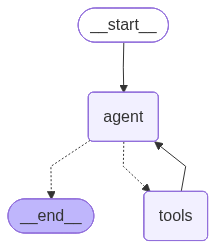

In [28]:
from IPython.display import Image, display

display(Image(agent.get_graph().draw_mermaid_png()))

In [29]:
from uuid import uuid4
from langchain_core.runnables import RunnableConfig

config = RunnableConfig(configurable={"thread_id": uuid4().hex})

result = await agent.ainvoke(
    {"messages": [("user", "OpenAI의 최신 모델명을 알려주세요")]}
)

for message in result["messages"]:
    message.pretty_print()


2025-10-20 22:05:38 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


================================ Human Message =================================

OpenAI의 최신 모델명을 알려주세요
================================== Ai Message ==================================

2024년 6월 기준, OpenAI의 최신 모델명은 GPT-4입니다. 추가로 GPT-4 Turbo 같은 변형 모델도 있습니다. 더 구체적인 정보가 필요하시면 말씀해 주세요.


In [30]:
result = await agent.ainvoke(
    {"messages": [("user", "2025년 8월 기준으로 OpenAI 최신 모델은 GPT-5 입니다.")]}
)

for message in result["messages"]:
    message.pretty_print()

2025-10-20 22:07:21 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-20 22:07:28 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/responses "HTTP/1.1 200 OK"
2025-10-20 22:07:29 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-10-20 22:07:29 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-10-20 22:07:31 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-10-20 22:07:33 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/responses "HTTP/1.1 200 OK"
2025-10-20 22:07:37 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/responses "HTTP/1.1 200 OK"
2025-10-20 22:07:37 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-10-20 22:07:39 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK

================================ Human Message =================================

2025년 8월 기준으로 OpenAI 최신 모델은 GPT-5 입니다.
================================== Ai Message ==================================
Tool Calls:
  save_episode (call_UR7TbHZDmyzMWMYqZ89qtnZj)
 Call ID: call_UR7TbHZDmyzMWMYqZ89qtnZj
  Args:
    name: User provided info about OpenAI model
    content: User stated that as of August 2025, the latest OpenAI model is GPT-5.
    episode_type: text
    description: User information about OpenAI model version
================================= Tool Message =================================
Name: save_episode

에피소드 "User provided info about OpenAI model"이 저장되었습니다.
================================== Ai Message ==================================

알겠습니다. 2025년 8월 기준으로 OpenAI 최신 모델이 GPT-5라는 정보를 저장했습니다. 추가로 궁금한 점이나 필요한 정보가 있으면 알려주세요.


In [54]:
config = RunnableConfig(configurable={"thread_id": uuid4().hex})

result = await agent.ainvoke(
    {"messages": [("user", "OpenAI의 최신 모델명을 알려주세요.")]}
)

for message in result["messages"]:
    message.pretty_print()

2025-10-20 22:16:05 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-20 22:16:06 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-10-20 22:16:09 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


================================ Human Message =================================

OpenAI의 최신 모델명을 알려주세요.
================================== Ai Message ==================================
Tool Calls:
  get_memory (call_0iZLtUt6ldhWP28uPzmoOPox)
 Call ID: call_0iZLtUt6ldhWP28uPzmoOPox
  Args:
    query: OpenAI 최신 모델명
================================= Tool Message =================================
Name: get_memory

=== 현재 유효한 정보 ===
OpenAI의 최신 모델은 GPT-5이다.
GPT-5가 OpenAI의 현재 기본 모델이다.

[필터링 정보: 유효 2개, 만료 3개 제외됨]
================================== Ai Message ==================================

OpenAI의 최신 모델명은 GPT-5입니다. GPT-5가 현재 OpenAI의 기본 모델로 사용되고 있습니다.


#### 2. 커스텀 에이전트

In [ ]:
from typing import Annotated
from langgraph.graph import MessagesState, StateGraph
from langgraph.prebuilt import ToolNode


class State(MessagesState):
    user_name: Annotated[str, "유저 이름"]
    user_node_uuid: Annotated[str, "유저 uuid"]


tools = [save_episode, get_memory]
tool_node = ToolNode(tools)
llm_with_tools = llm.bind_tools(tools)

In [56]:
import asyncio
from graphiti_core.edges import EntityEdge
from langchain_core.messages import AIMessage


def _parse_invalid_time(invalid_at) -> datetime | None:
    """invalid_at 값을 datetime 객체로 변환"""

    try:
        invalid_time = invalid_at

        # 문자열인 경우 파싱
        if isinstance(invalid_time, str):
            # "Z"를 "+00:00"으로 변경하여 ISO 형식으로 파싱
            invalid_time = datetime.fromisoformat(invalid_time.replace("Z", "+00:00"))

        # timezone 정보가 없으면 UTC로 설정
        if invalid_time.tzinfo is None:
            invalid_time = invalid_time.replace(tzinfo=timezone.utc)

        return invalid_time

    except Exception:
        return None


def _is_edge_expired(edge: EntityEdge, current_time: datetime) -> bool:
    """엣지가 만료되었는지 확인"""

    # invalid_at 속성이 없거나 값이 없으면 만료되지 않음
    if not (hasattr(edge, "invalid_at") and edge.invalid_at):
        return False

    # invalid_at 시간 파싱
    invalid_time = _parse_invalid_time(edge.invalid_at)

    # 파싱 실패 시 만료되지 않은 것으로 간주
    if invalid_time is None:
        return False

    # 현재 시간이 만료 시간보다 이후면 만료됨
    return current_time > invalid_time


def _extract_fact_content(edge: EntityEdge) -> str:
    """엣지에서 fact 내용을 추출"""

    if hasattr(edge, "fact") and edge.fact:
        return edge.fact
    else:
        return str(edge)


def _format_facts_result(valid_facts: list[str], expired_count: int) -> str:
    """
    검색 결과를 포맷팅된 문자열로 변환

    Args:
        valid_facts: 유효한 fact 리스트
        expired_count: 만료된 정보 개수

    Returns:
        str: 포맷팅된 결과 문자열
    """
    # 유효한 정보가 없는 경우
    if not valid_facts:
        if expired_count > 0:
            return f"관련 정보가 있었지만 모두 만료되었습니다. (만료된 정보 {expired_count}개)"
        else:
            return "관련 정보를 찾을 수 없습니다."

    # 유효한 정보가 있는 경우
    result = "=== 현재 유효한 정보 ===\n"
    result += "\n".join(valid_facts)

    # 만료된 정보 통계 추가
    if expired_count > 0:
        result += f"\n\n[필터링 정보: 유효 {len(valid_facts)}개, 만료 {expired_count}개 제외됨]"

    return result


def edges_to_facts_string(edges: list[EntityEdge]) -> str:
    """
    Graphiti 검색 결과(엣지)를 읽기 쉬운 문자열로 변환

    Args:
        edges: Graphiti에서 검색된 EntityEdge 객체 리스트

    Returns:
        str: 포맷팅된 정보 문자열

    Examples:
        >>> edges = [edge1, edge2, edge3]
        >>> result = edges_to_facts_string(edges)
        >>> print(result)
        === 현재 유효한 정보 ===
        사용자는 피자를 좋아합니다
        사용자는 서울에 거주합니다

        [필터링 정보: 유효 2개, 만료 1개 제외됨]
    """
    # 빈 결과 체크
    if not edges:
        return "관련 정보를 찾을 수 없습니다."

    # 현재 시간
    current_time = datetime.now(timezone.utc)

    # 유효한 정보와 만료된 정보 분류
    valid_facts = []
    expired_count = 0

    for edge in edges:
        if _is_edge_expired(edge, current_time):
            expired_count += 1
        else:
            fact_content = _extract_fact_content(edge)
            valid_facts.append(fact_content)

    # 결과 포맷팅
    return _format_facts_result(valid_facts, expired_count)


async def _search_user_context(state: State) -> str | None:
    """
    사용자와 관련된 정보를 Graphiti에서 검색

    Returns:
        str | None: 검색된 정보 문자열 또는 None
    """
    messages = state.get("messages", [])
    if len(messages) == 0:
        return None

    # 마지막 메시지 가져오기
    last_message = messages[-1]
    # print(f"last_message: {last_message}")

    # 검색 쿼리 생성
    sender = "AI" if isinstance(last_message, AIMessage) else state["user_name"]
    graphiti_query = f"{sender}: {last_message.content}"
    # print(f"graphiti_query: {graphiti_query}")

    # Graphiti 검색 실행
    edge_results = await graphiti.search(
        graphiti_query, center_node_uuid=state["user_node_uuid"], num_results=5
    )
    # print("edge_results", edge_results)

    # 결과를 문자열로 변환
    facts_string = edges_to_facts_string(edge_results)
    # print(f"facts_string: {facts_string}")

    return facts_string


async def _save_conversation(state: State, response):
    """
    대화 내용을 Graphiti에 저장 (백그라운드)

    Args:
        state: 현재 상태
        response: LLM 응답
    """
    conversation_body = (
        f"{state['user_name']}: {state['messages'][0]}\nAI: {response.content}"
    )

    asyncio.create_task(
        graphiti.add_episode(
            name="Chatbot Response",
            episode_body=conversation_body,
            source=EpisodeType.message,
            reference_time=datetime.now(timezone.utc),
            source_description="Chatbot",
        )
    )


# 시스템 프롬프트 템플릿
system_prompt_template = """당신은 최신 정보를 저장하고 이를 기반으로 답변하는 지능형 에이전트입니다.
사용자가 입력한 정보를 저장하거나, 저장된 최신 정보를 기반으로 사용자의 질문에 정확하고 도움이 되는 답변을 제공해야 합니다.
특히 사용자의 메모리에 담긴 취향이나 정보를 검색해서 적절한 답변을 할 수 있습니다.

사용 가능한 도구:
- save_episode: 사용자가 제공한 정보를 저장합니다. 정보가 특정 시점에 한정된다면 시간 정보를 함께 저장해야 합니다.
- get_memory: 사용자와의 대화 기록이나 저장된 정보를 검색하여 질문에 답할 때 사용합니다.

답변 시 유의사항:
- 간결하고 명확하게 답변하세요.
- 저장된 정보가 부족하거나 추가 정보가 필요하다면 사용자에게 다시 물어보세요.
- 최신 정보를 우선적으로 활용하여 답변하세요.

사용자 관련 정보 및 대화 기록:
{facts_string}"""


async def chatbot(state: State):
    """
    메인 챗봇 함수

    처리 흐름:
    1. 사용자 관련 정보 검색
    2. 시스템 프롬프트 생성
    3. LLM 응답 생성
    4. 대화 내용 저장
    """
    # 1. 사용자 컨텍스트 검색
    facts_string = await _search_user_context(state)

    # 2. 시스템 메시지 생성
    system_message = system_prompt_template.format(facts_string=facts_string)

    # 3. LLM 호출
    response = await llm_with_tools.ainvoke(
        [("system", system_message)] + state["messages"]
    )

    # 4. 대화 저장 (도구 호출이 아닌 경우만)
    if not response.tool_calls:
        await _save_conversation(state, response)

    return {"messages": [response]}

In [60]:
from langgraph.graph import START
from langgraph.prebuilt import tools_condition
from langgraph.checkpoint.memory import InMemorySaver

graph = (
    StateGraph(State)
    .add_node("chatbot", chatbot)
    .add_node("tools", tool_node)
    .add_edge(START, "chatbot")
    .add_conditional_edges("chatbot", tools_condition)
    .add_edge("tools", "chatbot")
).compile(checkpointer=InMemorySaver())

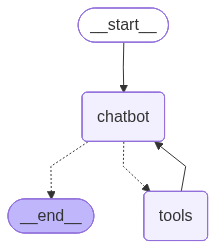

In [61]:
graph

#### 에피소드 저장

In [ ]:
from datetime import datetime, timezone, timedelta
from graphiti_core.nodes import EpisodeType

history = [
    {
        "messages": """
지훈: 넷플릭스에서 '오징어 게임 시즌2' 나왔던데, 주말에 정주행해야겠어.
AI: 오, 시즌2 드디어 나왔군요! 시즌1도 재밌게 보셨어요?
        """,
        "timestamp": datetime.now(timezone.utc) - timedelta(days=2),
    },
    {
        "messages": """
지훈: 시즌1은 진짜 명작이었지. 특히 깐부 할아버지 나오는 에피소드에서 울었어 ㅠㅠ
AI: 그 에피소드 정말 감동적이었죠. 시즌2도 기대되시겠어요. 보통 주말에 뭐 보세요?
        """,
        "timestamp": datetime.now(timezone.utc) - timedelta(days=2),
    },
    {
        "messages": """
지훈: 요즘엔 한국 드라마보다 일본 애니메이션을 더 많이 봐. 특히 '주술회전' 같은 다크 판타지 장르 좋아해.
AI: 다크 판타지 장르 좋아하시는군요! '주술회전' 액션 연출이 정말 뛰어나죠.
        """,
        "timestamp": datetime.now(timezone.utc) - timedelta(days=1),
    },
]

for idx, chat in enumerate(history):
    # 타임스탬프가 있으면 사용, 없으면 현재 시간 사용
    reference_time = chat.get("timestamp", datetime.now(timezone.utc))

    await graphiti.add_episode(
        name=f"{user_name} Conversation #{idx + 1}",
        episode_body=chat["messages"].strip(),  # 공백 제거
        source=EpisodeType.message,
        reference_time=reference_time,
        source_description=f"Chatbot conversation with {user_name}",
    )


In [ ]:
# 그래프 실행
config = RunnableConfig(configurable={"thread_id": uuid4().hex})

user_name = "지훈"


result = await graph.ainvoke(
    {
        "messages": [
            (
                "user",
                scenario.test_query,
            )
        ],
        "user_name": scenario.user_name,
        "user_node_uuid": user_node_uuid,
    },
    config=config,
)